In [ ]:
!pip install opencv-python
!pip install tensorflow
!pip install keras



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
from tensorflow import keras
import cv2
import numpy as np



In [ ]:
from pathlib import Path

In [ ]:
data_path = Path('/content/drive/MyDrive/Drowsy_Dataset')

In [ ]:
train_data = []
train_labels = []


In [ ]:
def preprocess_data(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img / 255.0
    img = np.expand_dims(img, axis=-1)
    return img


In [ ]:
for folder in [data_path / 'train' / 'closed_eye', data_path / 'train' / 'open_eye', data_path / 'train' / 'no_yawn', data_path / 'train' / 'yawn']:
    for file in folder.glob('*'):
        img_path = str(file)
        img = preprocess_data(img_path)
        train_data.append(img)
        if "closed_eye" in str(folder):
            train_labels.append(0)
        elif "open_eye" in str(folder):
            train_labels.append(1)
        elif "no_yawn" in str(folder):
            train_labels.append(2)
        elif "yawn" in str(folder):
            train_labels.append(3)

In [ ]:
test_data = []
test_labels = []


In [ ]:
for folder in [data_path / 'test' / 'closed_eye', data_path / 'test' / 'open_eye', data_path / 'test' / 'no_yawn', data_path / 'test' / 'yawn']:
    for file in folder.glob('*'):
        img_path = str(file)
        img = preprocess_data(img_path)
        test_data.append(img)
        if "closed_eye" in str(folder):
            test_labels.append(0)
        elif "open_eye" in str(folder):
            test_labels.append(1)
        elif "no_yawn" in str(folder):
            test_labels.append(2)
        elif "yawn" in str(folder):
            test_labels.append(3)

In [ ]:
train_data = np.array(train_data)
train_labels = np.array(train_labels)
test_data = np.array(test_data)
test_labels = np.array(test_labels)

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(4, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_data=(test_data, test_labels))


Epoch 1/10
78/78 [==============================] - 18s 57ms/step - loss: 0.6137 - accuracy: 0.7154 - val_loss: 0.3892 - val_accuracy: 0.8268
Epoch 2/10
78/78 [==============================] - 4s 45ms/step - loss: 0.3571 - accuracy: 0.8391 - val_loss: 0.3387 - val_accuracy: 0.8430
Epoch 3/10
78/78 [==============================] - 4s 45ms/step - loss: 0.2381 - accuracy: 0.8966 - val_loss: 0.2438 - val_accuracy: 0.9053
Epoch 4/10
78/78 [==============================] - 4s 49ms/step - loss: 0.1935 - accuracy: 0.9242 - val_loss: 0.2852 - val_accuracy: 0.8891
Epoch 5/10
78/78 [==============================] - 4s 46ms/step - loss: 0.1681 - accuracy: 0.9518 - val_loss: 0.2397 - val_accuracy: 0.9122
Epoch 6/10
78/78 [==============================] - 4s 47ms/step - loss: 0.0999 - accuracy: 0.9651 - val_loss: 0.2016 - val_accuracy: 0.9400
Epoch 7/10
78/78 [==============================] - 4s 45ms/step - loss: 0.0818 - accuracy: 0.9753 - val_loss: 0.2271 - val_accuracy: 0.9400
Epoch 8/10
7

In [ ]:
test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)
print("Test accuracy:", test_acc)


14/14 - 0s - loss: 0.1998 - accuracy: 0.9469 - 200ms/epoch - 14ms/step
Test accuracy: 0.9468821883201599


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


14/14 [==============================] - 0s 15ms/step


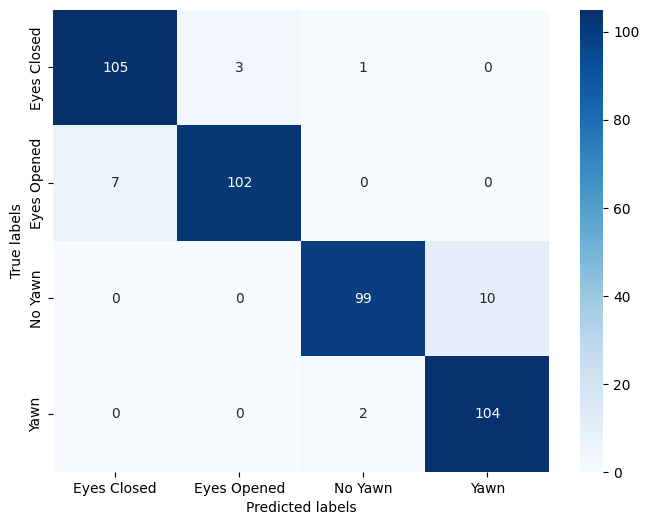

In [ ]:


# make predictions on the test data using the trained model
y_pred = model.predict(test_data)

# get the predicted labels from the predictions
y_pred_labels = np.argmax(y_pred, axis=1)

# compute the confusion matrix
conf_mat = tf.math.confusion_matrix(test_labels, y_pred_labels)

# convert the confusion matrix to a NumPy array
conf_mat = conf_mat.numpy()

# plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap=plt.cm.Blues, xticklabels=["Eyes Closed", "Eyes Opened", "No Yawn", "Yawn"], yticklabels=["Eyes Closed", "Eyes Opened", "No Yawn", "Yawn"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()



Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/10
78/78 [==============================] - 4s 49ms/step - loss: 0.0261 - accuracy: 0.9919 - val_loss: 0.2041 - val_accuracy: 0.9400 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/10
78/78 [==============================] - 4s 49ms/step - loss: 0.0284 - accuracy: 0.9907 - val_loss: 0.2501 - val_accuracy: 0.9330 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/10
78/78 [==============================] - 4s 47ms/step - loss: 0.0198 - accuracy: 0.9939 - val_loss: 0.2569 - val_accuracy: 0.9469 - lr: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.001.
Epoch 4/10
78/78 [==============================] - 4s 46ms/step - loss: 0.0431 - accuracy: 0.9862 - val_loss: 0.2836 - val_accuracy: 0.9099 - lr: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.0005.
Epoch 5/10
78/78 [==============================] - 4s 46ms/ste

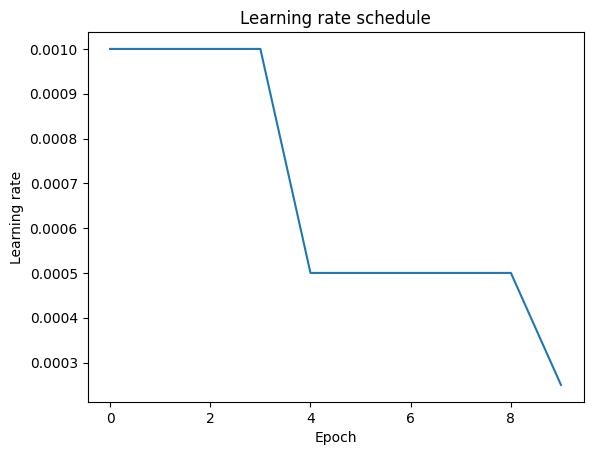

In [ ]:
import math
from tensorflow.keras.callbacks import LearningRateScheduler

# Define a function to schedule the learning rate
def schedule(epoch, lr):
    initial_lr = 0.001
    drop = 0.5
    epochs_drop = 5
    lr = initial_lr * math.pow(drop, math.floor((1 + epoch) / epochs_drop))
    return lr

# Create the LearningRateScheduler callback
lr_schedule = LearningRateScheduler(schedule, verbose=1)

# Train the model and pass the lr_schedule callback to the fit method
history = model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_data=(test_data, test_labels), callbacks=[lr_schedule])

# Plot the learning rate over the course of training
lr = [schedule(epoch, 0.0) for epoch in range(10)]
plt.plot(lr)
plt.xlabel('Epoch')
plt.ylabel('Learning rate')
plt.title('Learning rate schedule')
plt.show()


In [ ]:
img_path = '/content/Screenshot from 2023-05-05 21-46-55.png'

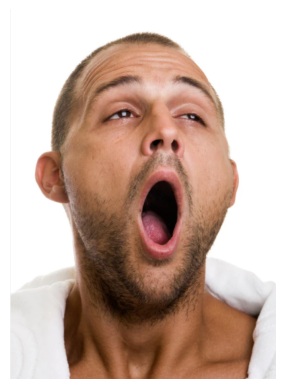

In [ ]:
img = cv2.imread(img_path)

# Display the image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
img = preprocess_data(img_path)

In [ ]:
# define a function to predict the label of an input image
def predict_image_label(img_path):
    # preprocess the input image
    img = preprocess_data(img_path)
    # add an extra dimension to the image to match the input shape of the model
    img = np.expand_dims(img, axis=0)

    # make a prediction on the image using the trained model
    prediction = model.predict(img)

    # get the predicted label from the prediction
    predicted_label = np.argmax(prediction)

    # return the predicted label
    if predicted_label == 0:
        return 'Closed Eye'
    elif predicted_label == 1:
        return 'Open Eye'
    elif predicted_label == 2:
        return 'No Yawn'
    else:
        return 'Yawn'


In [ ]:
predicted_label = predict_image_label(img_path)

1/1 [==============================] - 0s 24ms/step


In [ ]:
print('The predicted label is:', predicted_label)


The predicted label is: Closed Eye
